# Simulação de Monte Carlo com Python

Link: https://pbpython.com/monte-carlo.html

Acompanha o Texto Traduzido com o mesmo nome 

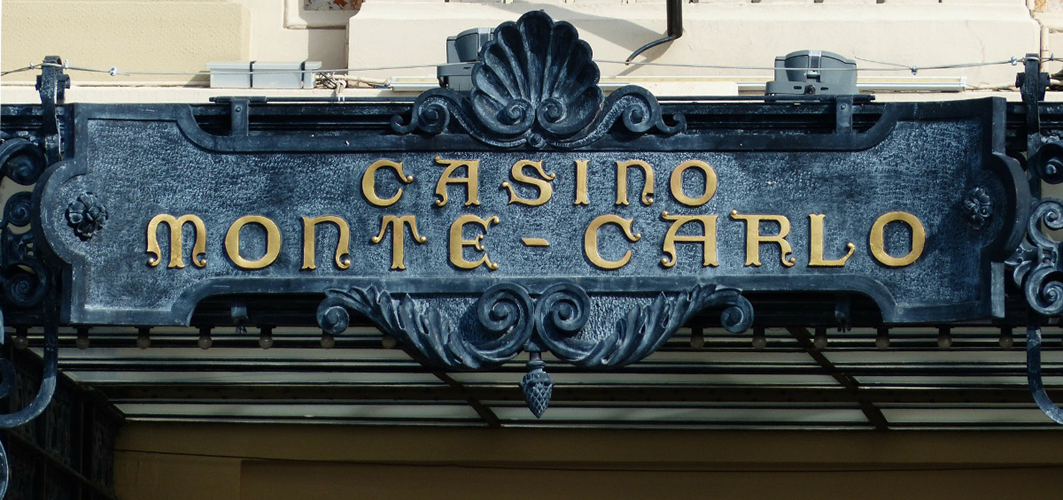

Completando as importações e definindo nosso estilo de plotagem

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns

sns.set_style('whitegrid')

Usaremos uma geração de números aleatórios pelo NumPy já que nele existem vários geradores de números aleatórios para criar amostras aleatórias com base em uma distribuição predefinida.

Usaremos o nosso porcentual histórico em relação ao desempenho alvo centrado em uma média de 100% e desvio padrão de 10%.
Abaixo definimos essas variáveis como também o número de representantes de vendas e o número de simulações que iremos fazer nesta modelagem:

In [2]:
media = 1               # média
desv_pad = 0.1          # desvio - padrão
num_reps = 500          #  número de representantes de vendas 
num_simulacoes = 1000   # número de simulações

Usaremos o NumPy para gerar uma lista de porcentagens que replicarão nossa distribuição normal histórica

In [3]:
pct_para_meta = np.random.normal(media, desv_pad, num_reps).round(2)
print(pct_para_meta)

[1.07 1.04 0.83 0.94 0.9  1.07 1.04 0.9  1.12 0.87 0.85 1.17 0.99 1.14
 0.84 1.02 0.86 1.02 0.95 0.91 1.15 0.95 0.97 0.97 0.94 0.93 0.78 1.01
 1.08 0.79 1.01 0.87 1.11 1.13 0.98 0.89 1.05 0.87 0.97 0.96 0.96 1.22
 0.95 1.19 1.02 0.96 1.03 0.93 0.88 0.97 0.97 0.93 0.94 1.03 0.99 0.77
 0.93 0.91 0.95 1.   1.06 1.08 1.01 0.92 1.22 1.04 0.99 0.88 0.9  0.99
 0.79 1.12 1.31 1.04 1.14 1.12 1.07 0.93 0.9  0.99 1.04 0.93 0.97 0.95
 0.94 0.93 1.01 1.03 0.97 0.98 0.92 1.07 1.05 1.08 1.   1.03 1.02 0.8
 1.09 0.99 0.92 1.07 1.02 0.89 0.99 0.99 0.95 1.04 1.1  0.99 1.08 0.85
 1.01 0.98 1.12 0.79 1.02 1.08 1.06 1.   0.9  1.16 0.76 0.92 1.14 0.97
 1.18 0.94 0.89 1.13 0.87 0.96 1.01 0.85 1.11 1.06 0.94 1.   0.82 0.96
 0.99 1.14 0.94 1.04 1.02 1.08 0.95 1.14 1.11 0.87 0.99 0.99 1.03 1.18
 1.15 0.93 0.85 0.86 1.07 0.95 0.83 1.24 1.02 1.01 1.04 0.99 0.79 1.04
 0.97 0.97 0.98 0.94 0.9  1.03 0.93 0.99 1.02 0.91 1.06 0.9  1.12 0.96
 0.94 0.93 1.08 1.08 1.03 0.87 0.97 0.75 0.95 0.99 0.92 1.1  0.94 1.1
 1.07 1.

Os 10 primeiros itens dessa lista de 500 itens, poderiam ser como abaixo, mas cada vez que rodamos eles mudam!!!!

In [8]:
#array([0.92, 0.98, 1.1, 0.93, 0.92, 0.99, 1.14, 1.28, 0.91, 1. ])

Como pagamos comissões todos os anos, entendemos nosso problema com um pouco mais de detalhes e podemos usar esse conhecimento prévio para construir um modelo mais preciso.
Como pagamos comissões há vários anos, podemos observar uma distribuição histórica típica de porcentagem para o alvo:

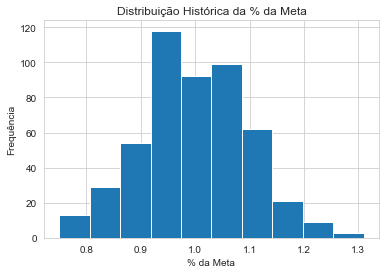

In [4]:
import matplotlib.pyplot as plt

x = pct_para_meta

plt.hist(x)
plt.xlabel('% da Meta')
plt.ylabel('Frequência')
plt.title('Distribuição Histórica da % da Meta')
plt.show()

Como estamos tentando melhorar nossa abordagem simples, vamos nos ater a uma distribuição normal para a porcentagem a ser atingida (pct_para_meta). Ao usar NumPy, porém, podemos ajustar e usar outra distribuição para modelos futuros, se necessário. No entanto, aviso que você não deve usar outros modelos sem realmente entendê-los e como eles se aplicam à sua situação.

Há um outro valor que precisamos simular e que é a meta de vendas real. Para ilustrar uma distribuição diferente, vamos supor que nossa distribuição de metas de vendas seja algo assim:

In [5]:
meta_vendas_valores = [75000, 100000, 200000, 300000, 400000, 500000]
meta_vendas_prob = [.3, .3, .2, .1, .05, .05]
meta_vendas = np.random.choice(meta_vendas_valores, num_reps, p = meta_vendas_prob)
print(meta_vendas)

[100000 300000 100000  75000 100000  75000 200000  75000 200000 100000
 100000  75000  75000  75000 200000 100000 400000  75000 200000 100000
 100000  75000  75000 300000 100000 200000 100000 200000  75000 200000
  75000 100000  75000  75000 100000 300000  75000 100000  75000  75000
 100000  75000 300000 200000 100000 200000 400000  75000 400000 200000
 200000  75000 200000 200000 100000 200000 100000 100000 500000  75000
  75000 100000 100000 100000 100000 100000 200000 100000  75000 100000
  75000  75000  75000  75000 100000  75000  75000 100000 100000 300000
 100000 100000 100000  75000 100000  75000  75000 100000 100000 400000
 500000 300000  75000 300000 200000 200000  75000  75000  75000 100000
 100000 100000  75000 200000  75000  75000 200000 500000 100000  75000
 300000  75000 100000 100000 200000  75000 200000  75000  75000  75000
 100000  75000  75000 300000 100000 300000  75000  75000 100000 300000
  75000  75000 100000 200000 100000 400000 200000 100000  75000 100000
  7500

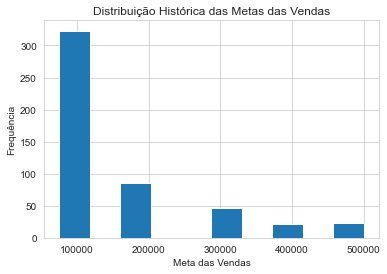

In [6]:
import matplotlib.pyplot as plt

x = meta_vendas

plt.hist(x)
plt.xlabel('Meta das Vendas')
plt.ylabel('Frequência')
plt.title('Distribuição Histórica das Metas das Vendas')
plt.show()

Esta definitivamente não é uma distribuição normal. Essa distribuição nos mostra que as metas de vendas são definidas em 1 de 6 blocos e a frequência diminui à medida que a quantidade aumenta. Essa distribuição pode ser indicativa de um processo muito simples de definição de metas, no qual os indivíduos são agrupados em determinados grupos e recebem metas consistentemente com base em sua posse, tamanho do território ou pipeline de vendas.
Para este exemplo, usaremos uma distribuição uniforme, mas atribuiremos taxas de probabilidade mais baixas para alguns dos valores.
Aqui está como podemos construir isso usando numpy.random.choice

É certo que este é um exemplo um tanto artificial, mas eu queria mostrar como diferentes distribuições podem ser incorporadas ao nosso modelo.
Agora que sabemos como criar nossas duas distribuições de entrada, vamos construir um dataframe de pandas:

In [7]:
df = pd.DataFrame(index=range(num_reps), data={'Pct_para_Meta':pct_para_meta, 'Meta_Vendas': meta_vendas})
df['Vendas_Reais'] = df['Pct_para_Meta'] * df['Meta_Vendas']
df

Pct_para_Meta  Meta_Vendas  Vendas_Reais
0             1.07       100000      107000.0
1             1.04       300000      312000.0
2             0.83       100000       83000.0
3             0.94        75000       70500.0
4             0.90       100000       90000.0
..             ...          ...           ...
495           1.04       200000      208000.0
496           0.97        75000       72750.0
497           0.88       200000      176000.0
498           0.97       100000       97000.0
499           0.95        75000       71250.0

[500 rows x 3 columns]

Aqui está a aparência do nosso novo dataframe:

Você pode notar que eu fiz um pequeno truque para calcular o valor real das vendas. Para este problema, o valor real das vendas pode mudar muito ao longo dos anos, mas a distribuição do desempenho permanece notavelmente consistente. Portanto, estou usando as distribuições aleatórias para gerar minhas entradas e apoiar as vendas reais.

A parte final do código que precisamos criar é uma maneira de mapear nosso Pct_para_Meta para a taxa de comissão. Aqui está a função:

In [8]:
def calc_taxa_comissao(x):
    """ Retorna a taxa de comissão baseada na tabela:
    0-90% = 2%
    91-99% = 3%
    >= 100 = 4%
    """
    if x <= .90:
        return .02
    if x <= .99:
        return .03
    else:
        return .04


O benefício adicional de usar python em vez do Excel é que podemos criar uma lógica muito mais complexa que é mais fácil de entender do que se tentássemos construir uma instrução if aninhada complexa no Excel.

Agora criamos nossa taxa de comissão e multiplicamos pelas vendas:

In [9]:
df['Taxa_Comissao'] = df['Pct_para_Meta'].apply(calc_taxa_comissao)
df['Valor_Comissao'] = df['Taxa_Comissao'] * df['Vendas_Reais']
df

Pct_para_Meta  Meta_Vendas  Vendas_Reais  Taxa_Comissao  Valor_Comissao
0             1.07       100000      107000.0           0.04          4280.0
1             1.04       300000      312000.0           0.04         12480.0
2             0.83       100000       83000.0           0.02          1660.0
3             0.94        75000       70500.0           0.03          2115.0
4             0.90       100000       90000.0           0.02          1800.0
..             ...          ...           ...            ...             ...
495           1.04       200000      208000.0           0.04          8320.0
496           0.97        75000       72750.0           0.03          2182.5
497           0.88       200000      176000.0           0.02          3520.0
498           0.97       100000       97000.0           0.03          2910.0
499           0.95        75000       71250.0           0.03          2137.5

[500 rows x 5 columns]

O resultado produzido se parece muito com um modelo do Excel que podemos construir.

Replicamos um modelo semelhante ao que teríamos feito no Excel, mas usamos algumas distribuições mais sofisticadas do que apenas lançar um monte de entradas de números aleatórios no problema.
Se somarmos os valores (apenas os 5 principais são mostrados acima) na coluna Commission_Amount, podemos ver que esta simulação mostra que pagaríamos $ 2.923.100.

Aqui está o código completo do laço.

In [10]:
# Defina uma lista para manter to keep todos os resultados de cada simulação que queremos analisar
todas_stats = []

# Laço por muitas simulações
for i in range(num_simulacoes):

    # Escolhe uma entrada aleatória para as metas vendas e porcentagem para meta
    meta_vendas = np.random.choice(meta_vendas_valores, num_reps, p=meta_vendas_prob)
    pct_para_meta = np.random.normal(media, desv_pad, num_reps).round(2)

    # Constroi o dataframe baseado nos inputs e o número de representantes
    df = pd.DataFrame(index=range(num_reps), data={'Pct_para_Meta': pct_para_meta,'Meta_Vendas': meta_vendas})

    # Volta para vendas reais usando a taxa porcentual à meta
    df['Vendas_Reais'] = df['Pct_para_Meta'] * df['Meta_Vendas']

    # Determina as taxas de comissões e calcula-as
    df['Taxa_Comissao'] = df['Pct_para_Meta'].apply(calc_taxa_comissao)
    df['Valor_Comissao'] = df['Taxa_Comissao'] * df['Vendas_Reais']

    # Queremos rastrear Vendas Reais, valor da Comissão e Meta de Vendas durante toda a simulação
    todas_stats.append([df['Vendas_Reais'].sum().round(0),
                      df['Valor_Comissao'].sum().round(0),
                      df['Meta_Vendas'].sum().round(0)])


Embora isso possa parecer um pouco intimidante no início, estamos incluindo apenas 7 instruções python dentro desse loop que podemos executar quantas vezes quisermos. No meu laptop padrão, posso executar 1.000 simulações em 2,75 segundos, portanto, não há motivo para não fazer isso muitas vezes, se necessário.
Em algum momento, há retornos decrescentes. Os resultados de 1 milhão de simulações não são necessariamente mais úteis do que 10.000. Meu conselho é tentar diferentes quantidades e ver como a saída muda.
Para analisar os resultados da simulação, vou construir um dataframe de todas_stats :

In [11]:
resultados_df = pd.DataFrame.from_records(todas_stats, columns=['Vendas_Reais',
                                                           'Valor_Comissao',
                                                           'Meta_Vendas'])


In [12]:
resultados_df.style.format('{:,}')

In [13]:
resultados_df.describe().style.format('{:,}')

Graficamente, ele se parece com isto:

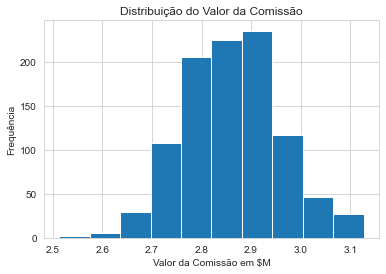

In [14]:
import matplotlib.pyplot as plt

x = resultados_df['Valor_Comissao'].div(1000000)

plt.hist(x)
plt.xlabel('Valor da Comissão em $M')
plt.ylabel('Frequência')
plt.title('Distribuição do Valor da Comissão')
plt.show()

Então, o que esse gráfico e a saída do describe nos dizem? Podemos ver que a despesa média com comissões é de US 2,85 milhões e o desvio padrão é de US 103 mil. Também podemos ver que o pagamento de comissões pode ser tão baixo quanto 2,5 milhões dólares ou tão alto quanto 3,2 milhões de dólares.
Com base nesses resultados, quão confortável você está de que a despesa com comissões seja inferior a US 3 milhões? Ou, se alguém disser: “Vamos orçar apenas US 2,7 milhões”, você se sentiria confortável com o fato de suas despesas ficarem abaixo desse valor? Provavelmente não.
Aí reside um dos benefícios da simulação de Monte Carlo. Você desenvolve uma melhor compreensão da distribuição de resultados prováveis e pode usar esse conhecimento mais sua perspicácia nos negócios para fazer uma estimativa informada.
O outro valor deste modelo é que você pode modelar muitas suposições diferentes e ver o que acontece. Aqui estão algumas mudanças simples que você pode fazer para ver como os resultados mudam:
•	Aumente a taxa de comissão máxima para 5%
•	Diminua o número de vendedores
•	Altere o desvio padrão esperado para um valor maior
•	Modificar a distribuição de alvos
Agora que o modelo foi criado, fazer essas alterações é tão simples quanto alguns ajustes de variável e reexecutar seu código. Você pode visualizar o notebook associado a esta postagem no github.
Outra observação sobre as simulações de Monte Carlo é que elas são relativamente fáceis de explicar ao usuário final da previsão. A pessoa que recebe essa estimativa pode não ter uma base matemática profunda, mas pode entender intuitivamente o que essa simulação está fazendo e como avaliar a probabilidade da gama de resultados potenciais.
Finalmente, acho que a abordagem mostrada aqui com python é mais fácil de entender e replicar do que algumas das soluções do Excel que você pode encontrar. Como python é uma linguagem de programação, há um fluxo linear para os cálculos que você pode seguir.
Conclusão
Uma simulação de Monte Carlo é uma ferramenta útil para prever resultados futuros calculando uma fórmula várias vezes com diferentes entradas aleatórias. Este é um processo que você pode executar no Excel, mas não é simples de fazer sem algum VBA ou plugins de terceiros potencialmente caros. Usar numpy e pandas para construir um modelo e gerar vários resultados potenciais e analisá-los é relativamente simples. O outro benefício adicional é que os analistas podem executar muitos cenários alterando as entradas e podem passar para modelos muito mais sofisticados no futuro, se surgirem as necessidades. Finalmente, os resultados podem ser compartilhados com usuários não técnicos e facilitar discussões em torno da incerteza dos resultados finais.
Espero que este exemplo seja útil para você e lhe dê idéias que você pode aplicar aos seus próprios problemas. Sinta-se à vontade para deixar um comentário se achar este artigo útil para desenvolver seus próprios modelos de estimativa.
Atualizações
19 de março de 2019: Com base nos comentários do reddit, fiz outra implementação que é mais rápida.
https://pbpython.com/excel-diff-pandas-update.html